# Enzyme kinetics: 
### How simulation compares with Michaelis-Menten and quasi-steady-state approximations
This file needs more details..

https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics

In [1]:
from chemreact import models
from ipywidgets import interact

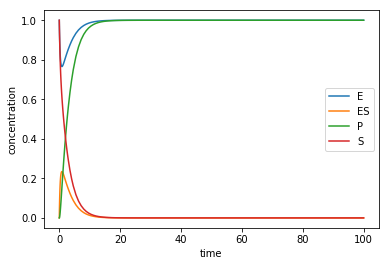

run time: 0.029s


In [7]:
chem = models.Chemistry()
chem.reaction('E+S<=>ES', k1=1, k2=1)
chem.reaction('ES=>E+P', k=1)
chem.initial_concentrations(E = 1, S = 1)
_=chem.run()

### Equilibrium approximation
$$
v = \frac{d[P]}{dt} = \frac{V_{max}[S]}{K_d + [S]}
$$
, where: 
$$
V_{max} = k_{cat}(E+ES)
$$
, and 
$$
K_d = \frac{k_r}{k_f}
$$

Valid if
$$
\varepsilon_d = \frac{k_{cat}}{k_r}\ll1
$$

In [50]:
class eq_appr(models.Chemistry):
    def _ode(self, t, c):
        if c[3]>=self.initial_values['S']:
            return [0,0,0,0]
        k = self.rate_constants
        E0=c[0]+c[2]
        Kd=k[1]/k[0]
        Vmax = k[2]*E0
        v=(Vmax*c[1])/(Kd+c[1])
        return [v,0,-v,v]

run time: 0.034s


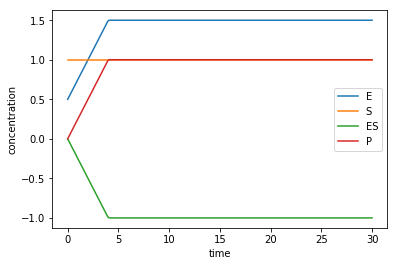

In [51]:
chem_eq = eq_appr()
chem_eq.reaction('E+S<=>ES')
chem_eq.reaction('ES=>E+P')
chem_eq.initial_concentrations(E = 0.5, S = 1)
chem_eq.time_stop = 30
_=chem_eq.run()

### Quasi-steady-state approximation:
$$
v = \frac{d [\ce P]}{d t} = k_\mathrm{cat} \\
[\ce{ES}] = \frac{V_\max {[\ce S]}}{K_\mathrm{M} + [\ce S]} \\
$$
, where
$$
V_\max = k_\mathrm{cat} [\ce E]_0.
$$

In [60]:
class qss_appr(models.Chemistry):
    def _ode(self, t, c):
        E0=c[0]+c[2]
        k = self.rate_constants
        Km=(k[1]+k[2])/k[0]
        Vmax = k[2]*E0
        
        v=(Vmax*c[1])/(Km+c[1])
        
        return [0,-v,0,v]

In [61]:
chem_qss.initial_values

OrderedDict([('E', 0.5), ('S', 1), ('ES', 0), ('P', 0)])

run time: 0.048s


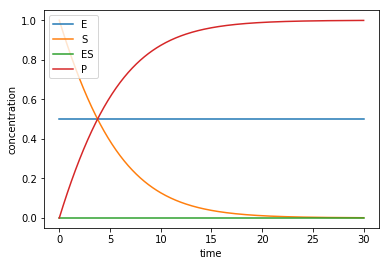

In [62]:
chem_qss = qss_appr()
chem_qss.reaction('E+S<=>ES')
chem_qss.reaction('ES=>E+P')
chem_qss.initial_concentrations(E = 0.5, S = 1)
chem_qss.time_stop = 30
_=chem_qss.run()

(-0.1, 1.1)

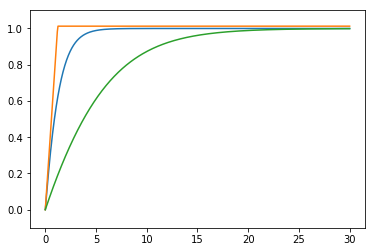

In [63]:
for c in [chem, chem_eq, chem_qss]:
    p.plot(c.solution['t'], c.solution['P'], label = c)
axes = p.gca()
axes.set_ylim([-0.1,1.1])

In [6]:
import ipywidgets as widgets
import numpy as np
from ipywidgets import interact, interact_manual
from threading import Thread

r=(1,100,0.1)
@interact
def test(kf=r,kr=r,kcat=(0.01,10,0.1)):
    k=[kf,kr,kcat]

    for c in [chem, chem_eq, chem_qss]:
        c.rate_constants = k
        c.run(plot=False)

    for c in [chem, chem_eq, chem_qss]:
        p.plot(c.solution['t'], c.solution['P'], label = c)

interactive(children=(FloatSlider(value=50.0, description='kf', min=1.0), FloatSlider(value=50.0, description=…